# SF1626 Lecture highlights: Chapter 15
by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

Lecture 1: 15.1, 15.2

Lecture 2: 15.3, 15.4

Lecture 3: 15.5, 15.6

## Chap 15.1 Vector fields and Streamlines

As usual, in this course, we only work with the standard basis in $\mathbb{R}^d$, $d=2,3$.

**Definition**: A vector field in $\mathbb{R}^2$ is a function $\mathbf{F}:\mathbb{R}^2\mapsto\mathbb{R}^2$

$$\mathbf{F}(x,y)= F_1(x,y)\mathbf{i}+ F_2(x,y)\mathbf{j}$$

So at every point in the domain, $\mathbf{F}$ is a vector (direction+magnitude).

* Examples: The description of wind in the weather report, gravitation

**Definition**: a curve whose tangents are prescribed by $\mathbf{F}$ is called a **streamline** of $\mathbf{F}$.

* Streamline = integral curve = flow line = trajectory

* Imagine a particle whose trajectory is described by $\vec\gamma(t)$. 
    
    The trajectory is a streamline of $\mathbf{F}$ if the differential equation is satisfied

$$ \vec\gamma^\prime(t) = \mathbf{F}\circ\vec\gamma(t) $$

$$\vec\gamma(t)= (\gamma_1(t), \gamma_2(t)),~~~$$

$$\mathbf{F}\circ\vec\gamma(t) \equiv \mathbf{F}(\gamma_1(t),\gamma_2(t))\equiv \mathbf{F}(\gamma(t))$$

In the book, the streamline equation of $\mathbf{F}$ is described with an additional scaling factor, $\lambda(t)$:

$$ \vec\gamma^\prime(t) = \lambda(t)\mathbf{F}\circ\vec\gamma(t) $$

The differential equation can also be written in the form:

(The change is the x-component, divided by $F_1$ is the same as the other similar terms) 

$$\frac{dx}{F_1(x,y,z)}=\frac{dy}{F_2(x,y,z)}=\frac{dz}{F_3(x,y,z)}$$

$$\vec\gamma(t) = ( x(t), y(t), z(t) ),~~~~\mathbf{F}(x,y,z)=(F_1(x,y,z), F_2(x,y,z),F_3(x,y,z))$$

In several examples in the book, such as Examples 3,4,5 (p 870). For each example, there are functions defined in 3D, 
$\psi_1, \psi_2$, satisfying
$$ \frac{d}{dt}\psi_j(\gamma(t)) = \nabla\psi_j(\gamma(t)) \cdot \gamma^\prime(t) =0,~~~~j=1,2.$$

* the field line lies on the level set of each function
* I.e. the **field line** lies on the intersection of the level sets of $\psi_1$ and $\psi_2$.

(For 2D, there is only one function $\psi$)

Example 4.  $\mathbf{v}=-\Omega y\mathbf{i}+\Omega x\mathbf{j}$

Let the streamline be parameterized by $\vec\gamma(t)=x(t)\mathbf{i}+y(t)\mathbf{j}$

$$\gamma^\prime = x^\prime(t)\mathbf{i}+y^\prime(t)\mathbf{j}=-\Omega y\mathbf{i}+\Omega x\mathbf{j}$$

$$ \frac{x^\prime}{-\Omega y}=\frac{y^\prime}{\Omega x} \iff x(t)x^\prime(t) + y(t)y^\prime(t)\equiv 0$$

From the last equation: 

$$x(t)x^\prime(t) + y(t)y^\prime(t) = \frac{1}{2}\frac{d}{dt} \left(x^2(t)+y^2(t) \right)\equiv 0$$

we find that $\psi(x,y)=x^2+y^2$ and the streamlines are concentric circles:

$$\frac{d}{dt}\psi( x(t), y(t))\equiv 0$$

Remark: such fucntions are naturally not unique. if $\psi$ worsk,  $\lambda\psi$ also works.

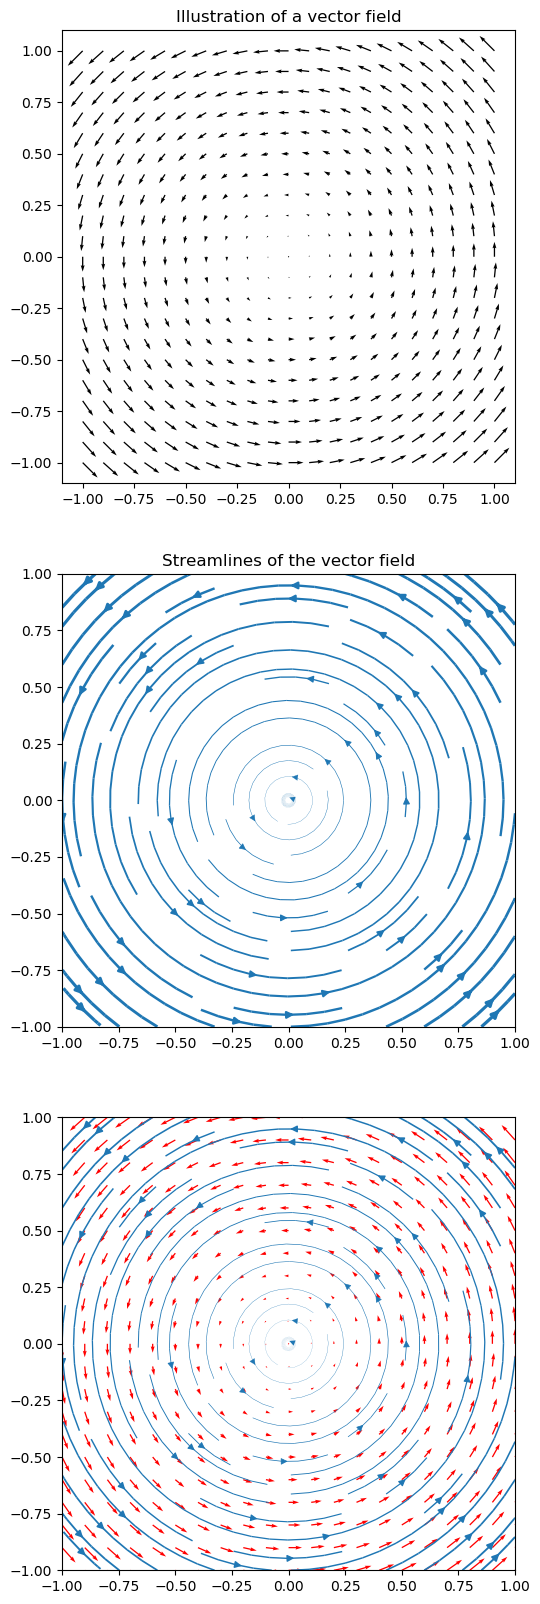

(-1.0, 1.0000000000000018, -1.0000000000000007, 1.000000000000001)

In [1]:
#Example 2: Gravitational field of a point mass
using PyPlot

Y= repeat( range(-1, stop=1, length=21), 1, 21)
X= repeat( vec(range(-1, stop=1, length=21))', 21, 1) 

Ω=π/40

v1(x,y)= -Ω*y
v2(x,y)=  Ω*x

V1=v1.(X,Y)
V2=v2.(X,Y)

#pygui(false)
fig = figure("A vector field and its streamlines",figsize=(20,20))

subplot(311)
quiver(X, Y, V1, V2)
title("Illustration of a vector field")
axis("square")

subplot(313)
quiver(X, Y, V1, V2, color="red")

subplot(312)
Y= repeat( range(-1, stop=1, length=101), 1, 101)
X= repeat( vec(range(-1, stop=1, length=101))', 101, 1) #copy(Y')

speed=sqrt.(v1.(X,Y).^2+v2.(X,Y).^2);
lw = 2.5 * speed / maximum(speed) # Line Widths
streamplot(X, Y, v1.(X,Y), v2.(X,Y), density=0.86, linewidth=lw)
title("Streamlines of the vector field")
axis("square")

subplot(313)
lw = 1.5 * speed / maximum(speed) # Line Widths
streamplot(X, Y, v1.(X,Y), v2.(X,Y), density=0.86, linewidth=lw)
axis("square")

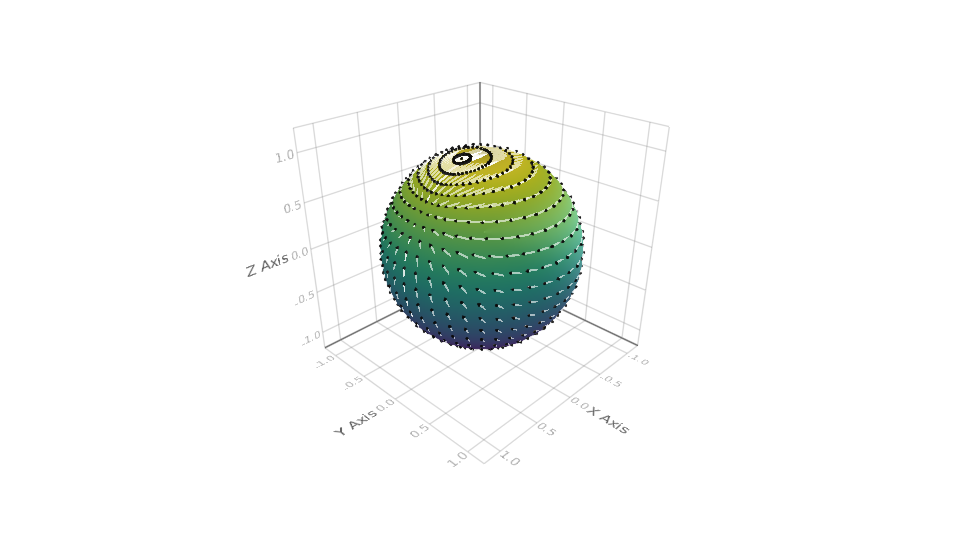

In [16]:
using LinearAlgebra
using Makie

n = 20
f   = (x,y,z) -> x*exp(cos(y)*z)
∇f  = (x,y,z) -> Point3f0(exp(cos(y)*z), -sin(y)*z*x*exp(cos(y)*z), x*cos(y)*exp(cos(y)*z))
∇ˢf = (x,y,z) -> ∇f(x,y,z) - Point3f0(x,y,z)*dot(Point3f0(x,y,z), ∇f(x,y,z))

θ = [0;(0.5:n-0.5)/n;1]
φ = [(0:2n-2)*2/(2n-1);2]
x = [cospi(φ)*sinpi(θ) for θ in θ, φ in φ]
y = [sinpi(φ)*sinpi(θ) for θ in θ, φ in φ]
z = [cospi(θ) for θ in θ, φ in φ]

pts = vec(Point3f0.(x, y, z))
∇ˢF = vec(∇ˢf.(x, y, z)) .* 0.1f0
surface(x, y, z)
arrows!(
    pts, ∇ˢF,
    arrowsize = 0.03, linecolor = (:white, 0.6), linewidth = 3
)

In [17]:
pts

880-element Array{Point{3,Float32},1}:
 [0.0, 0.0, 1.0]            
 [0.0784591, 0.0, 0.996917] 
 [0.233445, 0.0, 0.97237]   
 [0.382683, 0.0, 0.92388]   
 [0.522499, 0.0, 0.85264]   
 [0.649448, 0.0, 0.760406]  
 [0.760406, 0.0, 0.649448]  
 [0.85264, 0.0, 0.522499]   
 [0.92388, 0.0, 0.382683]   
 [0.97237, 0.0, 0.233445]   
 [0.996917, 0.0, 0.0784591] 
 [0.996917, 0.0, -0.0784591]
 [0.97237, 0.0, -0.233445]  
 ⋮                          
 [0.996917, 0.0, 0.0784591] 
 [0.996917, 0.0, -0.0784591]
 [0.97237, 0.0, -0.233445]  
 [0.92388, 0.0, -0.382683]  
 [0.85264, 0.0, -0.522499]  
 [0.760406, 0.0, -0.649448] 
 [0.649448, 0.0, -0.760406] 
 [0.522499, 0.0, -0.85264]  
 [0.382683, 0.0, -0.92388]  
 [0.233445, 0.0, -0.97237]  
 [0.0784591, 0.0, -0.996917]
 [0.0, 0.0, -1.0]           

Do Examples 3, 4 (p870)

### Vector fields in polar coordinates


$$\mathbf{F}(r,\theta) = F_1(r,\theta)~\vec{\mathbf{r}}+F_2(r,\theta)~\vec{\mathbf{\theta}}$$

where the basis vectors are related to the standard basis vectors as the followings:

$$\begin{align} \vec{\mathbf{r}} &:= ~~\cos\theta~\mathbf{i} + \sin\theta~\mathbf{j}\\
                   \vec{\mathbf{\theta}} &:= -\sin\theta~\mathbf{i} + \cos\theta~\mathbf{j}\end{align}$$
                   
                   
Let's how the vector field $$\mathbf{F}(r,\theta) = r~\vec{\mathbf{r}}+\theta~\vec{\mathbf{\theta}}$$ looks like on the x-y plane.

## Chap 15.2 Conservative vector fields

You need to know the meanings of **conservative vecor fields" and "potential functions**

Definition 1 (p874): 

$$\mathbf{F}(x,y,z) = \nabla\phi(x,y,z),~~~~~~(x,y,z)\in D.$$

* $\mathbf{F}$ is called a **conservative vector field**
* $\phi$ is a **potential** for $\mathbf{F}$

In the form of *differential*: 

$$d\phi = F_1(x,y,z)~dx + F_2(x,y,z)~dy+F_3(x,y,z)~dz$$

**Remark: check out Theorem 1 (p891) for an important property of a conservative vector field.**

Do Example 1 (p875) The potential function for the gravitational field

### Necessary conditions for a conservative vector field in 2D and 3D

This is based on the equivalence of second order partial derivatives of $\phi$



In [ ]:
Do a few examples: Example 3, Example 6 (p881)

## Chap 15.3 Line integrals

I will use $\gamma$ in place of $\mathbf{r}$ used in the book.

The formula to understand:

$$\int_\mathcal{C} f(x,y,z) ds = \int_a^b f(\gamma(t))\left| \frac{d\gamma}{dt}\right|dt$$


* Integrate $f$ along the curve, $\mathcal{C}$, parameterized as $\gamma(t)$ for $a\le t\le b$.

* **What is $ds$?**

Appriximate by a sum:

* Introduce a partition over $[a,b]$: $a\le a+j\Delta t\le b, \Delta t := (b-a)/N$
* $\gamma(t_j)$ are a set of points on the curve $\mathcal{C}$
* On this set of points, we have a set of values from $f$: $f_j:= f(\gamma(t_j))$
* The **incorrect** sum  
$$ \sum_{j=0}^{N-1} f(\gamma(t_j))\Delta t \longrightarrow \int_a^b f(\gamma(t))dt $$
* The correct sum has comes with appropirate weights $J_j$
$$ \sum_{j=0}^{N-1} f(\gamma(t_j))J_j \Delta t \longrightarrow \int_{\mathcal{C}} f(\gamma(t))ds $$


You need to udnerstand:
* **What is $ds$, the arc length element**?
* **How is $ds$ related to $dt$**?

A special case: $f\equiv 1$, $\int_\mathcal{C} 1 ds = $ the length of the curve $\mathcal{C}$. 

In [3]:
using PyPlot
using LinearAlgebra

Γ(t)   =[cos(t/2); sin(t/2)]
dΓdt(t)=[ -sin(t/2)/2; cos(t/2)/2]

t=range(0, stop=2π, length=201)

sum1=0.0
sum2=0.0

for i=2:length(t)
    Δt=t[i]-t[i-1]
    ΔΓ = norm( Γ(t[i])-Γ(t[i-1]) ) 
    
    sum1+= ΔΓ
    sum2+= norm(dΓdt(t[i]))*Δt
    
end

display( [sum1 sum2])

1×2 Array{Float64,2}:
 3.14156  3.14159

### Chap 15.4 Line integrals of projection of vector fields along a curve

$$\int_\mathcal{C} \mathbf{F}\cdot d\mathbf{r}$$

Best explained from the view point of computing the *work* done by the force $\mathbf{F}$ along a prescribed curve $\gamma$.

* The vector field:

$$\mathbf{F}(x,y,z)$$

* The projection of $\mathbf{F}$ onto the curve $\gamma(t)$ is defined as
    
$$ F_\tau(t):=F(\gamma(t))\cdot \frac{\gamma^\prime(t)}{|\gamma^\prime(t)|} $$ 

    (no work is done perpendicular to the direction of motion)

* The total work done: 

$$ \int_\mathcal{C} F_\tau(t) ds = \int_\mathbf{C} F_\tau(t) |\gamma^\prime(t)| dt $$

---
The following notations are equivalent:

$$\int_\mathcal{C} \mathbf{F}\cdot d\mathbf{r} := \int_\mathcal{C} F(\gamma(t))\cdot \frac{\gamma^\prime(t)}{|\gamma^\prime(t)|} |\gamma^\prime(t)| dt=\int_\mathcal{C} F(\gamma(t))\cdot \gamma^\prime(t) dt$$ 

* In particular, if the curve $\mathcal{C}$ is a closed curve, 
$$\oint_\mathcal{C} \mathbf{F}\cdot d\mathbf{r}$$ 
denotes the **circulation** of $\mathbf{F}$ around $\mathcal{C}$.

You need to know the definition of **connected** and **simply connected** domains.

**Very important theorem**:

**Theorem 1** (p 891) $D$ is an open connected domain. $\mathbf{F}$ is a smooth vector field on $D$.

The following statements are *equivalent*:

(a) $\mathbf{F}$ is conservative in $D$

(b) $\oint_\mathcal{C} \mathbf{F}\cdot d\mathbf{r} = 0$ for *every* piecewise smooth curve $\mathcal{C}$ in $D$

(c) Given two points $P_0$ and $P_1$ in $D$. For *any* piecewise smooth curves $C_1$ and $C_2$ which. start at $P_0$ and end at $P_1$, 

$$\int_{C_1} \mathbf{F}\cdot d\mathbf{r} = \int_{C_2} \mathbf{F}\cdot d\mathbf{r}$$

***
The gist of this theorem is this:

* $\mathbf{F}$ is conservative $\implies$ for some potential function $\phi$
$$\mathbf{F}=\nabla\phi$$ 


* Chain rule: $F(\gamma(t))\gamma^\prime(t) = \nabla\phi(\gamma(t))\gamma^\prime(t) = \frac{d}{dt} \phi(\gamma(t))$

So $$ \int_C \mathbf{F}\cdot d\mathbf{r} =\int_C \nabla\phi \cdot \gamma^\prime dt = \int_o^1\frac{d}{dt} \phi(\gamma(t)) dt = \phi( \gamma(1))-\phi(\gamma(0)) $$
Here the curve $C$ is parameterized by $\gamma(t)$ for $0\le t\le 1$.

Do Example 3(p 893,  p867 in Ed 7) 

#### An additional notation used widely in the book

Whenever you see 

$$\int_\mathcal{C} F_1(x,y) dx+F_2(x,y) dy$$

It does **not** mean that you integrate in the variable $x$ and in the $y$ variable and add up to two integrals.

This notation comes from the differential of $\mathbf{r}(t):=x(t)~\mathbf{i}+y(t)~\mathbf{j}$, which is
$$ d\mathbf{r} = dx~\mathbf{i}+dy~\mathbf{j} $$

**Always interpret it as**

$$\int_\mathcal{C} \mathbf{F}\cdot d\mathbf{r},~~~~ \mathbf{F}=F_1(x,y)~\mathbf{i}+F_2(x,y~\mathbf{j} $$



In [ ]:
See Example 4 (p893).

## Surfaces and surface integrals

### Parametric surfaces

A **parametric surface** in 3-space: $\mathbf{r}: (u,v)\in[a,b]\times[c,d]\mapsto \mathbf{R}^3$

$$ \mathbf{r}(u,v) = x(u,v)~\mathbf{i}+y(u,v)~\mathbf{j}+z(u,v)~\mathbf{k} $$

* The graph of a function $f(x,y)$ is a surface parametrized by $(x,y)$ ($u=x,v=y$):

$$\mathbf{r}(x,y) = x~\mathbf{i}+y~\mathbf{j}+f(x,y)~\mathbf{k}$$

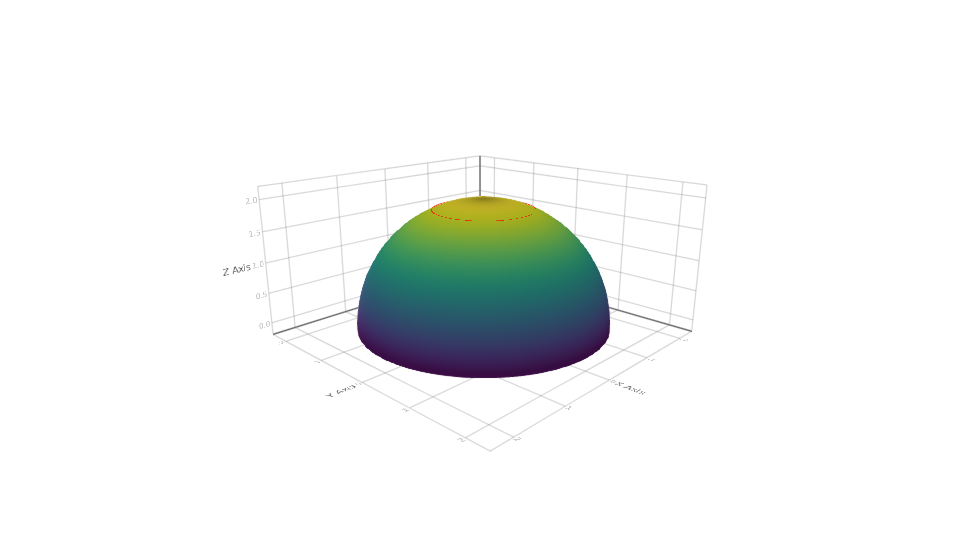

In [4]:
#Example 3

a=2.0

u_range=range(0, stop=2π, length=51)
v_range=range(0, stop=π/2, length=51)

rx=[ a*cos(u)*sin(v) for u in u_range, v in v_range]
ry=[ a*sin(u)*sin(v) for u in u_range, v in v_range]
rz=[ a*cos(v)        for u in u_range, v in v_range]

using Makie

surface(rx, ry, rz, color=:gray, alpha=0.4)

rx=[ a*cos(u)*sin(v) for u in u_range, v in v_range[14]]
ry=[ a*sin(u)*sin(v) for u in u_range, v in v_range[14]]
rz=[ a*cos(v)        for u in u_range, v in v_range[14]]

lines!(rx, ry, rz, color = :red, markersize = 0.5)

### Surface integrals

$$ \int_\Sigma f(x,y,z) dS = \iint_{D_{uv}} f(\mathbf{r}(u,v)) \left| \frac{\partial\mathbf{r}}{\partial u}\times \frac{\partial\mathbf{r}}{\partial v}\right|dudv $$

* If $f\equiv 1$, the integral is the area of the surface
* If $f$ is the density of some material ( $g/m^2$ ), the integral gives the total weight of this material on the surface.

Approximate $S$ by a set of small planes (linear approximations).

$$\sum_{i=1}^n f(x_i, y_i,z_i)\Delta S_i \longrightarrow \int_\Sigma f(x,y,z) dS$$

Each small piece $\Delta S$ (ignoring the subindex $i$) is formed by the span of $\mathbf{r}_u=\frac{\partial\mathbf{r}}{\partial u}$ and $\mathbf{r}_v=\frac{\partial\mathbf{r}}{\partial v}$:

$$ \Delta S(\sigma, t) = \mathbf{r}(u_k,v_\ell) +\sigma\frac{\partial\mathbf{r}}{\partial u}+t\frac{\partial\mathbf{r}}{\partial v},~~~0\le \sigma\le\Delta u,~0\le t\le\Delta v $$

So the area of this piece of surface is:

$$\Delta S = \left|\frac{\partial\mathbf{r}}{\partial u}\times\frac{\partial\mathbf{r}}{\partial v}\right| \Delta u\Delta v$$

#### Normal vectors of the surface

* For a fixed $v=v_\ell$, $\mathbf{r}(u,v_\ell)$ is a curve, *parametrized by $u$*, running on the surface

    * So $\frac{\partial \mathbf{r}}{\partial u}$ describes tangent vectors for this curve and for the surface.


* For a fixed $u=u_k$, $\mathbf{r}(u_k,v)$ is a curve, *parametrized by $v$*, running on the surface

    * So $\frac{\partial \mathbf{r}}{\partial v}$ describes tangent vectors for this curve and for the surface.

So to get a normal vector for $\Sigma$ at $(x(u_k, v_\ell), y(u_k,v_\ell), z(u_k, v_\ell))$, we can compute the cross product of the above two tangent vectors:


$$\mathbf{n} = \frac{\partial\mathbf{r}}{\partial u}\times\frac{\partial\mathbf{r}}{\partial v}$$

Do Example 5.

Do example 4: integrating on the graph of a function

## Chap 15.6 Oriented surfaces anf flux integrals

You need to know two things in this section:

* Orientation of a surface and it's boundary (if it has boundaries)

* The **flux** of a vector field across an oriented surface 

$$ \iint_\Sigma \mathbf{F}\cdot \hat{\mathbf{N}} dS = \iint_\Sigma \mathbf{F}\cdot d\mathbf{S} $$

If the surface is parametrized by $(u,v)\mapsto (x(u,v), y(u,v), z(u,v))$, 

$$\iint_\Sigma \mathbf{F}\cdot \hat{\mathbf{N}} dS=\pm \iint_\Sigma \mathbf{F}\cdot\left( \frac{\partial\mathbf{r}}{\partial u}\times\frac{\partial\mathbf{r}}{\partial v}\right) dudv $$

* Flux describes the rate of some quantity passing through a unit surface.

* Tytpical dimensions of the flux of a: (quantity)/(time)/(area)
  
  * the average amount of water that flows through a cross-section of a pipe *per second*
  * the average amount of solar energy received on the ground.

